# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Used Car Dataset - Bhoye Manish Dattu</p>

### Introduction About the Data :

**The dataset** aims to predict the asking price of a used car, making it a Regression Analysis problem.
There are 9 independent variables:

* `brand` : Manufacturer or brand of the car (e.g., Maruti, Hyundai, Honda).
* `model` : Specific model name of the car.
* `year` : Year of manufacture of the car.
* `age` : Age of the car (derived from year).
* `km_driven` : Total distance driven by the car (in kilometers)
* `fuel_type` : Type of fuel used (Petrol, Diesel, CNG, etc.).
* `transmission` : Transmission type (Manual or Automatic).
* `seller_type` : Type of seller (Individual or Dealer).
* `additioninfo` : Additional information or features related to the car’s condition or listing.


Target variable:
* `askprice`: The asking price of the used car, which we aim to predict based on the above features.
Dataset Source Link :
[https://www.kaggle.com/datasets/mohitkumar282/used-car-dataset](https://www.kaggle.com/datasets/mohitkumar282/used-car-dataset)

### Read Dataset

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

In [108]:
import pandas as pd
df = pd.read_csv("/used_car_dataset.csv")
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


### Dataset Info

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


### Identifier Handling

In [112]:
df.columns
if 'car_id' in df.columns:
    df.drop('car_id', axis=1, inplace=True)



# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values in Dataset</p>

In [4]:
df.isna().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,47
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


### Missing Values found in the dataset as KmDriven

In [126]:
if 'kmDriven' in df.columns:

    df['kmDriven'] = df['kmDriven'].astype(str).str.replace(' km', '', regex=False).str.replace(',', '', regex=False).astype(float)

    median_kmDriven = df['kmDriven'].median()

    df['kmDriven'].fillna(median_kmDriven, inplace=True)
else:
    print("kmDriven column not found")

df['kmDriven']

/tmp/ipython-input-1305705750.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kmDriven'].fillna(median_kmDriven, inplace=True)


,kmDriven
0,98000.0
1,190000.0
2,77246.0
3,83500.0
4,45000.0
...,...
9577,105904.0
9578,55000.0
9579,92000.0
9580,72000.0


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicates in Dataset and Removing </p>

In [114]:
df.duplicated().sum()

np.int64(724)

In [115]:
df.drop_duplicates(inplace=True)


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

### Numerical and Categorical columns seperation

In [116]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['Year', 'Age']
Categorical Columns : ['Brand', 'model', 'kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice']


### Numerical Columns Description

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8851.0,2016.377697,4.133730,1986.0,2014.0,2017.0,2019.0,2024.0
Age,8851.0,7.622303,4.133730,0.0,5.0,7.0,10.0,38.0
kmDriven,8851.0,70979.277370,56864.792468,0.0,43327.0,65000.0,86000.0,980002.0


### Categorical Columns Description

In [23]:
df[categorical_columns].describe().T

,count,unique,top,freq
Brand,8851,39,Maruti Suzuki,2589
model,8851,400,City,306
Transmission,8851,2,Manual,4662
Owner,8851,2,first,4592
FuelType,8851,3,Diesel,3517
PostedDate,8851,12,Nov-24,8007
AdditionInfo,8851,7307,Good condition,14
AskPrice,8851,1330,"₹ 4,50,000",124


### All unique values in dataset

In [24]:
df.nunique()

,0
Brand,39
model,400
Year,32
Age,32
kmDriven,1745
Transmission,2
Owner,2
FuelType,3
PostedDate,12
AdditionInfo,7307


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis with Visualisation</p>

### Univariate Analysis of Numerical Variables

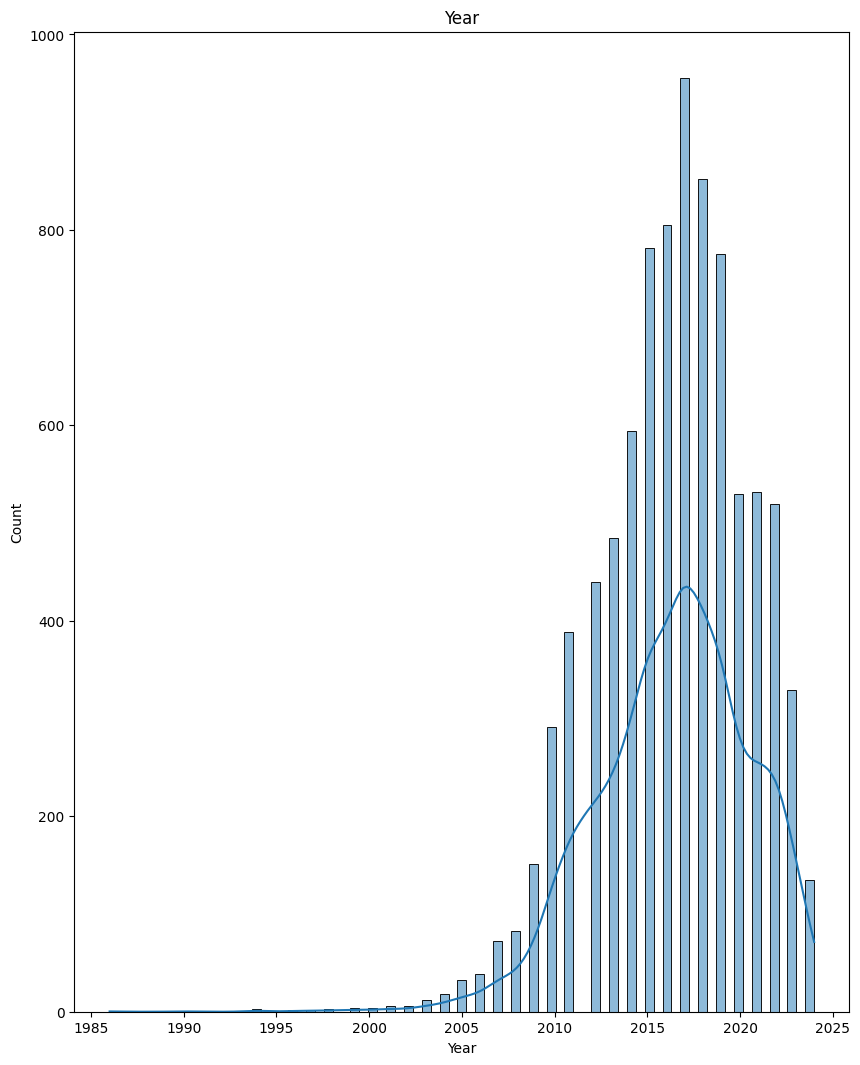

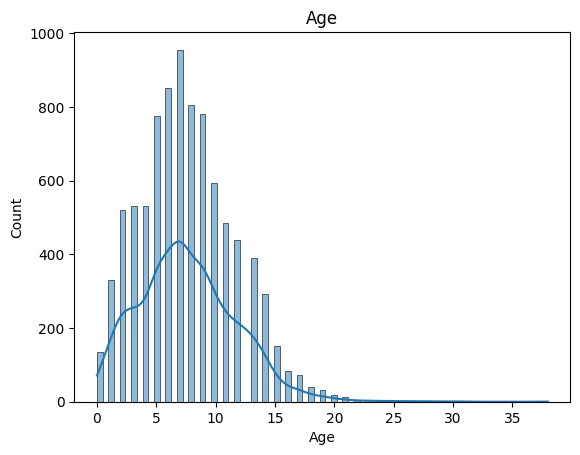

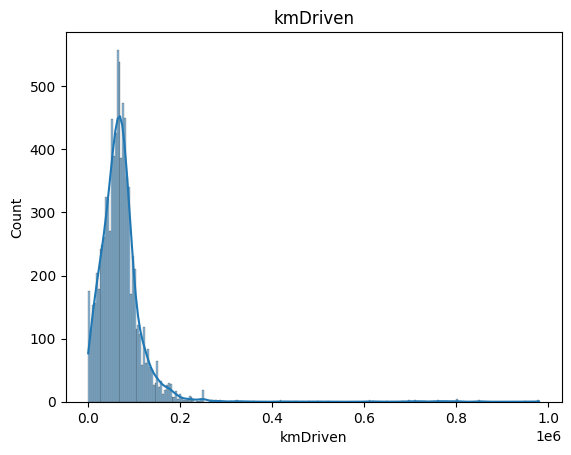

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

### Univariate analysis for categorical variables

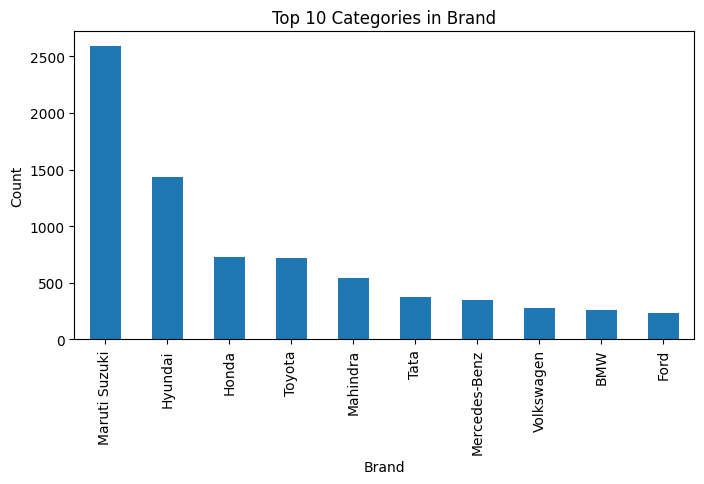

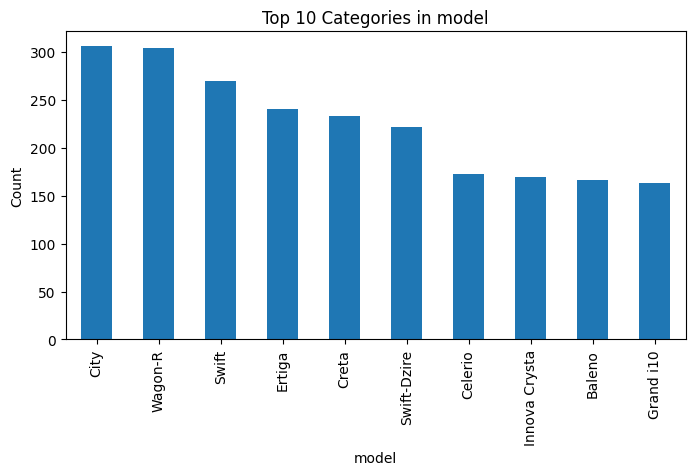

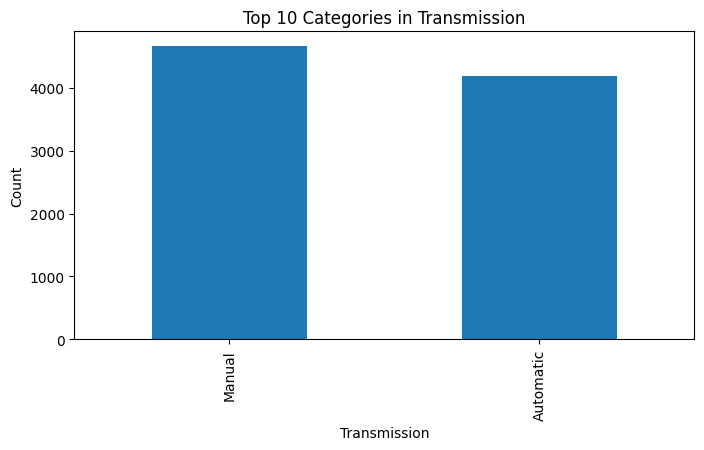

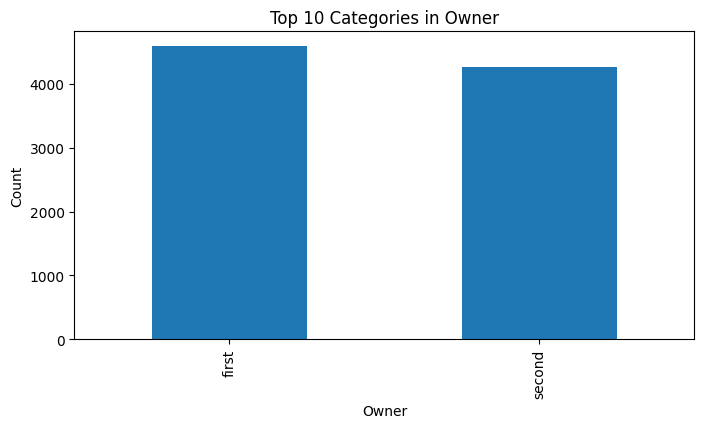

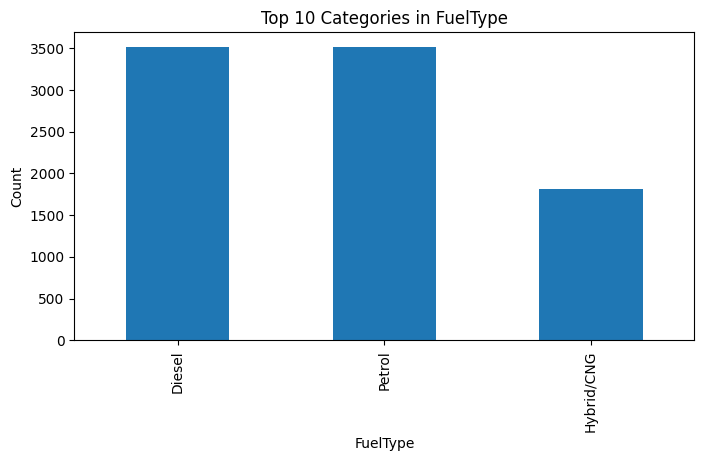

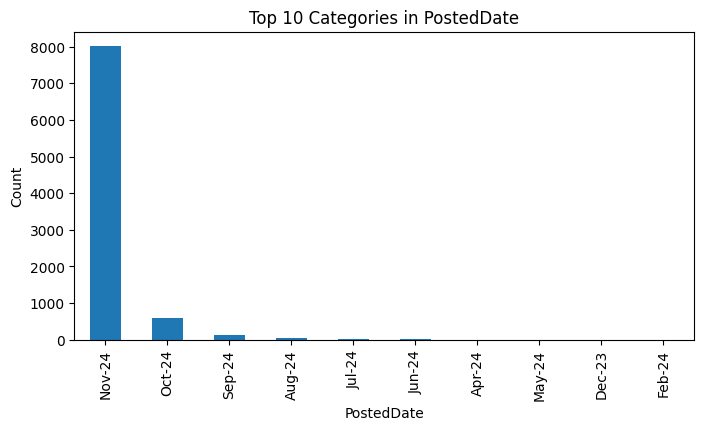

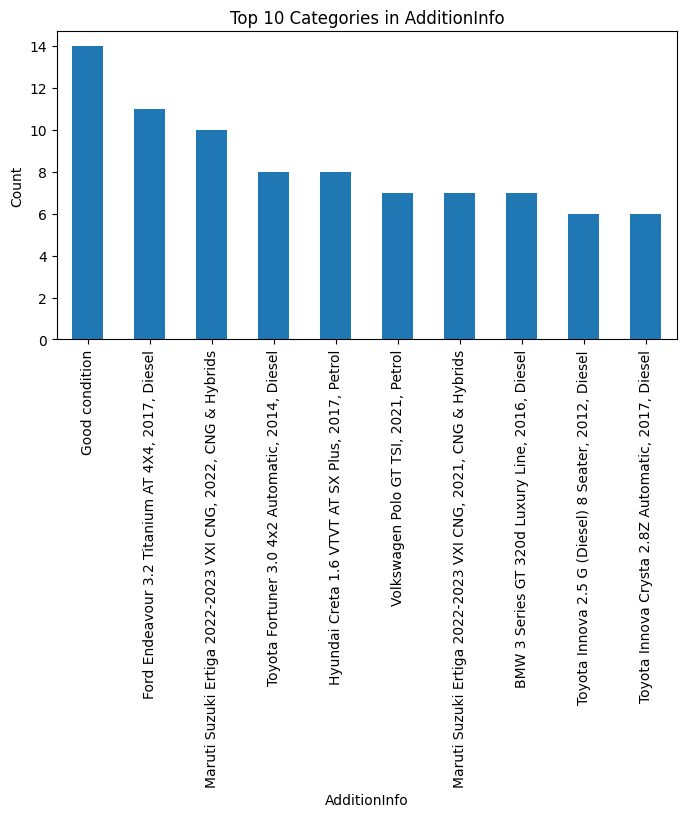

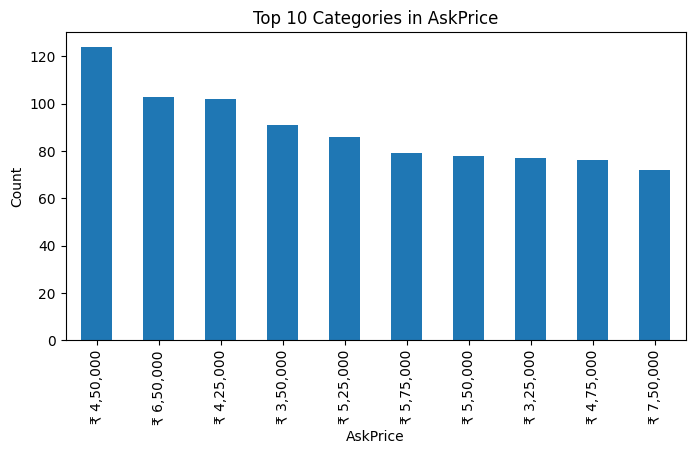

In [34]:
TOP_N = 10

for col in categorical_columns:
    top_vals = df[col].value_counts().head(TOP_N)

    plt.figure(figsize=(8,4))
    top_vals.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Top {TOP_N} Categories in {col}")
    plt.show()


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Bivariate Analysis with Visualisation</p>

### Correlation heatmap

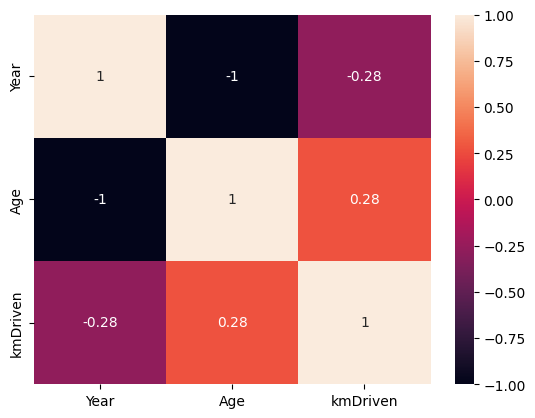

In [35]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### Pairplot

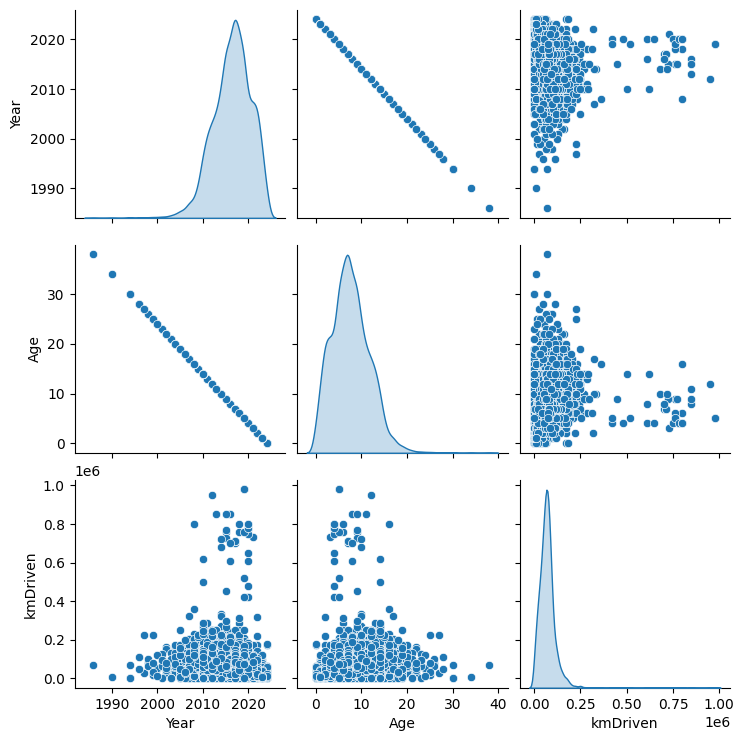

In [36]:
sb.pairplot(df,diag_kind='kde')
plt.show()

## Categorical Features vs Target Feature Price Boxplot

/tmp/ipython-input-516232914.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values, palette='viridis')


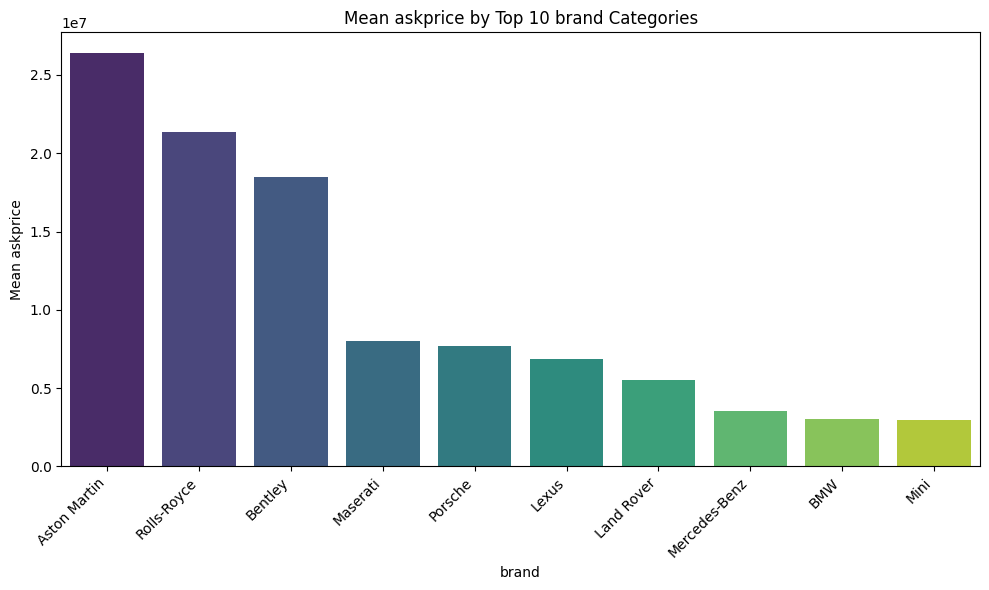

/tmp/ipython-input-516232914.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values, palette='viridis')


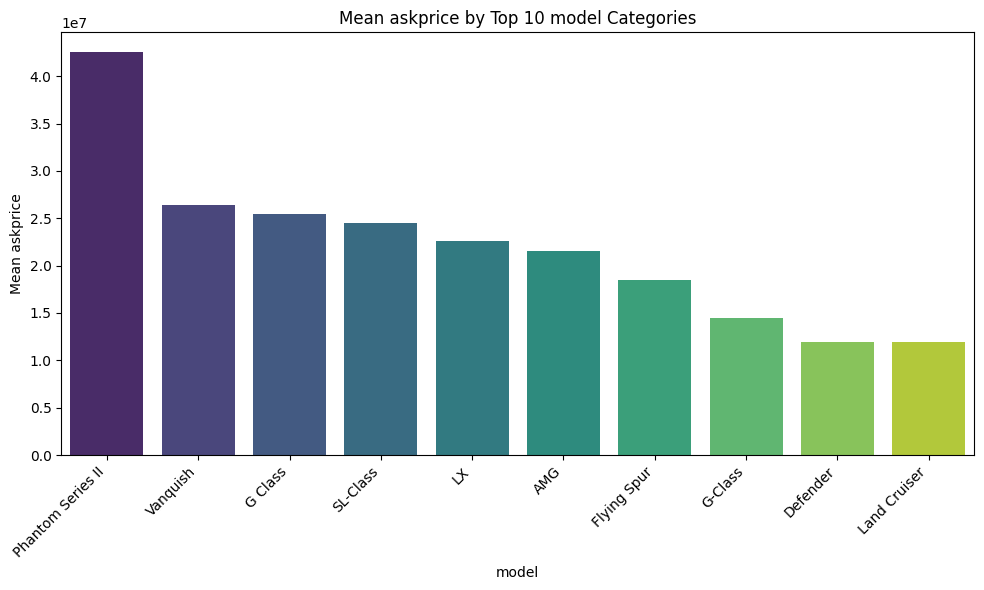

/tmp/ipython-input-516232914.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values, palette='viridis')


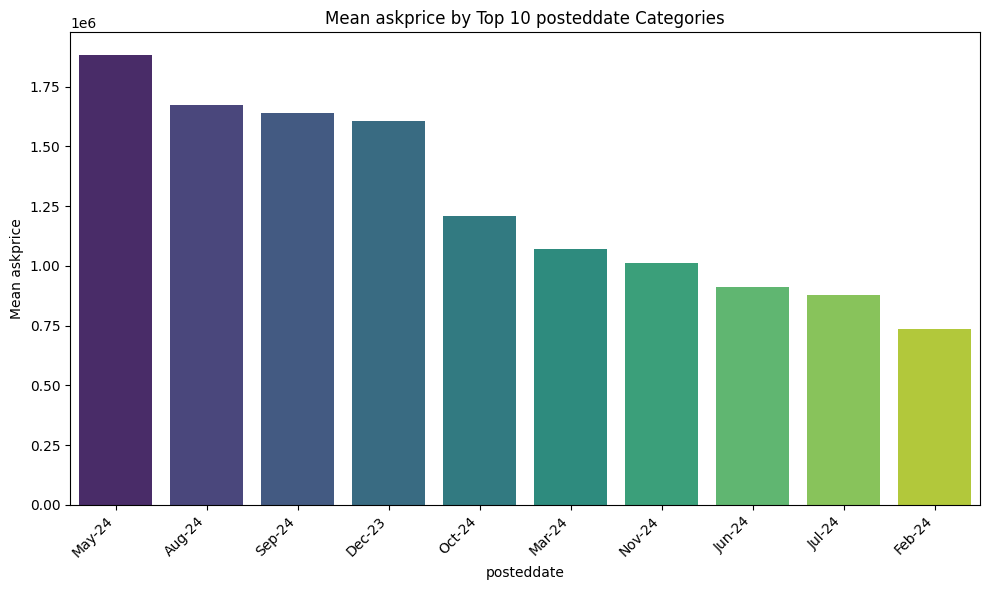

/tmp/ipython-input-516232914.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values, palette='viridis')


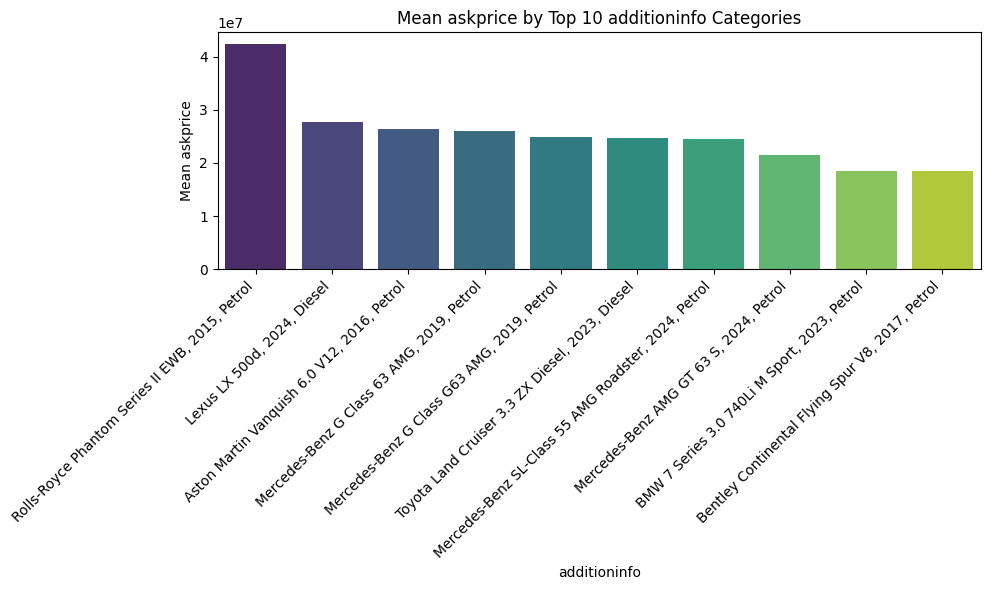

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

target_column = 'askprice'

if df[target_column].dtype == 'object':
    df[target_column] = df[target_column].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

TOP_N = 10


current_categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist() if col != target_column]

for col in current_categorical_cols:

    category_means = df.groupby(col)[target_column].mean().sort_values(ascending=False).head(TOP_N)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_means.index, y=category_means.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel(f'Mean {target_column}')
    plt.title(f'Mean {target_column} by Top {TOP_N} {col} Categories')
    plt.tight_layout()
    plt.show()


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ordinal Mapping of categorical features</p>

#### It is observed that categorical variables such as owner type, car condition (additioninfo), and age-related categories in the used car dataset are ordinal in nature



### Creating Mapper for each categorical variable

In [120]:
fuel_map = {'Diesel': 0, 'Petrol': 1, 'CNG': 2}
seller_map = {'Dealer': 0, 'Individual': 1}
transmission_map = {'Manual': 0, 'Automatic': 1}


### Applying the mapper to the dataframe

In [123]:
df['FuelType'] = df['FuelType'].map(fuel_map)
df['Owner'] = df['Owner'].map(seller_map)
df['Transmission'] = df['Transmission'].map(transmission_map)

In [64]:
df.head()

,brand,model,year,age,kmdriven,transmission,owner,fueltype,posteddate,additioninfo,askprice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Mutual Information Scores</p>

### Seperating X and Y

In [98]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop('askprice', axis=1)
y = df['askprice']

### Calculating Mutual Information scores for regression

In [100]:
import numpy as np

X_for_mi = X.copy()

object_cols_in_X = X_for_mi.select_dtypes(include='object').columns
for col in object_cols_in_X:
    X_for_mi[col] = X_for_mi[col].astype('category').cat.codes
for col in ['owner', 'fueltype', 'transmission']:
    if col in X_for_mi.columns and X_for_mi[col].dtype == 'float64':
        X_for_mi[col] = X_for_mi[col].fillna(-1).astype(int)

discrete_feature_indices = [i for i, col in enumerate(X_for_mi.columns)
                            if col in object_cols_in_X or col in ['owner', 'fueltype', 'transmission', 'Year', 'Age']]

mi_scores = mutual_info_regression(X_for_mi, y, discrete_features=discrete_feature_indices, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

mi_df

,Feature,MI_Score
9,additioninfo,2.053714
1,model,1.034710
0,brand,0.391119
3,age,0.353611
2,year,0.352805
4,kmdriven,0.137080
5,transmission,0.118909
7,fueltype,0.098470
8,posteddate,0.005536
6,owner,0.000000


In [125]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

### Visualizing Mutual Information Scores

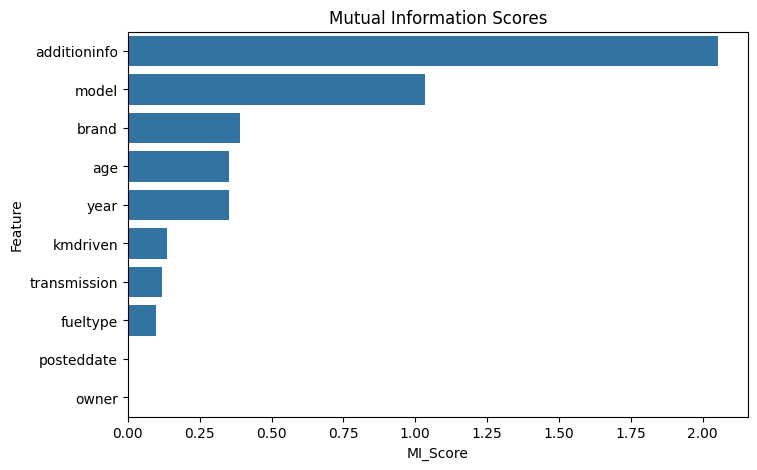

In [124]:
plt.figure(figsize=(8,5))
sns.barplot(x='MI_Score', y='Feature', data=mi_df)
plt.title("Mutual Information Scores")
plt.show()

#### Conclusion : The analysis shows that brand, model, age/year, and additioninfo are the most important features for predicting the askprice of a used car, as they have the strongest influence on vehicle value and depreciation.